In [228]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [229]:
%cd /content/drive/My Drive/

/content/drive/My Drive


In [230]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten,Input,Dropout,MaxPooling2D
from tensorflow.keras import datasets, layers, models
from tensorflow.math import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import EfficientNetB4, Xception, ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random
import os
import cv2
import warnings
warnings.filterwarnings('ignore')

In [231]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/Glasses'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/Colab Notebooks/Glasses/Glasses.ipynb
/content/drive/MyDrive/Colab Notebooks/Glasses/test/row-1-column-2.jpg
/content/drive/MyDrive/Colab Notebooks/Glasses/test/row-1-column-1.jpg
/content/drive/MyDrive/Colab Notebooks/Glasses/test/row-1-column-10.jpg
/content/drive/MyDrive/Colab Notebooks/Glasses/test/row-7-column-4.jpg
/content/drive/MyDrive/Colab Notebooks/Glasses/test/row-1-column-4.jpg
/content/drive/MyDrive/Colab Notebooks/Glasses/test/row-7-column-7.jpg
/content/drive/MyDrive/Colab Notebooks/Glasses/test/row-7-column-1.jpg
/content/drive/MyDrive/Colab Notebooks/Glasses/test/row-1-column-9.jpg
/content/drive/MyDrive/Colab Notebooks/Glasses/test/row-1-column-8.jpg
/content/drive/MyDrive/Colab Notebooks/Glasses/test/row-1-column-3.jpg
/content/drive/MyDrive/Colab Notebooks/Glasses/test/row-7-column-3.jpg
/content/drive/MyDrive/Colab Notebooks/Glasses/test/row-1-column-6.jpg
/content/drive/MyDrive/Colab Notebooks/Glasses/test/row-1-column-7.jpg
/content/drive/

In [232]:
train_dir ="/content/drive/MyDrive/Colab Notebooks/Glasses/train"
val_dir = "/content/drive/MyDrive/Colab Notebooks/Glasses/validate"

In [233]:
glasses_dir=os.path.join(train_dir,'glasses')
no_glasses_dir = os.path.join(train_dir, 'noglasses')
val_glasses_dir = os.path.join(val_dir, 'glasses')
val_no_glasses_dir = os.path.join(val_dir, 'noglasses')

In [234]:
glasses_images=[os.path.join(glasses_dir,img) for img in os.listdir(glasses_dir)]
no_glasses_images=[os.path.join(no_glasses_dir,img) for img in os.listdir(no_glasses_dir)]
val_glasses_images=[os.path.join(val_glasses_dir,img) for img in os.listdir(val_glasses_dir)]
val_no_glasses_images=[os.path.join(val_no_glasses_dir,img) for img in os.listdir(val_no_glasses_dir) ]

In [235]:
glasses_df = pd.DataFrame({'image_path': glasses_images, 'label': "Yes"})
no_glasses_df = pd.DataFrame({'image_path': no_glasses_images, 'label': "No"})
val_glasses_df = pd.DataFrame({'image_path': val_glasses_images, 'label': "Yes"})
val_no_glasses_df = pd.DataFrame({'image_path': val_no_glasses_images, 'label': "No"})

In [236]:
train = pd.concat([glasses_df, no_glasses_df], ignore_index=True)
val = pd.concat([val_glasses_df, val_no_glasses_df], ignore_index=True)

In [237]:
train = train.sample(frac=1).reset_index(drop=True)
val = val.sample(frac=1).reset_index(drop=True)

In [238]:
 train.head(10)

image_path label
0  /content/drive/MyDrive/Colab Notebooks/Glasses...    No
1  /content/drive/MyDrive/Colab Notebooks/Glasses...   Yes
2  /content/drive/MyDrive/Colab Notebooks/Glasses...    No
3  /content/drive/MyDrive/Colab Notebooks/Glasses...   Yes
4  /content/drive/MyDrive/Colab Notebooks/Glasses...    No
5  /content/drive/MyDrive/Colab Notebooks/Glasses...   Yes
6  /content/drive/MyDrive/Colab Notebooks/Glasses...   Yes
7  /content/drive/MyDrive/Colab Notebooks/Glasses...   Yes
8  /content/drive/MyDrive/Colab Notebooks/Glasses...   Yes
9  /content/drive/MyDrive/Colab Notebooks/Glasses...   Yes

In [239]:
 val.head(10)

image_path label
0  /content/drive/MyDrive/Colab Notebooks/Glasses...   Yes
1  /content/drive/MyDrive/Colab Notebooks/Glasses...    No
2  /content/drive/MyDrive/Colab Notebooks/Glasses...   Yes
3  /content/drive/MyDrive/Colab Notebooks/Glasses...    No
4  /content/drive/MyDrive/Colab Notebooks/Glasses...   Yes
5  /content/drive/MyDrive/Colab Notebooks/Glasses...   Yes
6  /content/drive/MyDrive/Colab Notebooks/Glasses...    No
7  /content/drive/MyDrive/Colab Notebooks/Glasses...   Yes
8  /content/drive/MyDrive/Colab Notebooks/Glasses...   Yes
9  /content/drive/MyDrive/Colab Notebooks/Glasses...    No

In [240]:
train.shape

(104, 2)

In [241]:
val.shape

(40, 2)

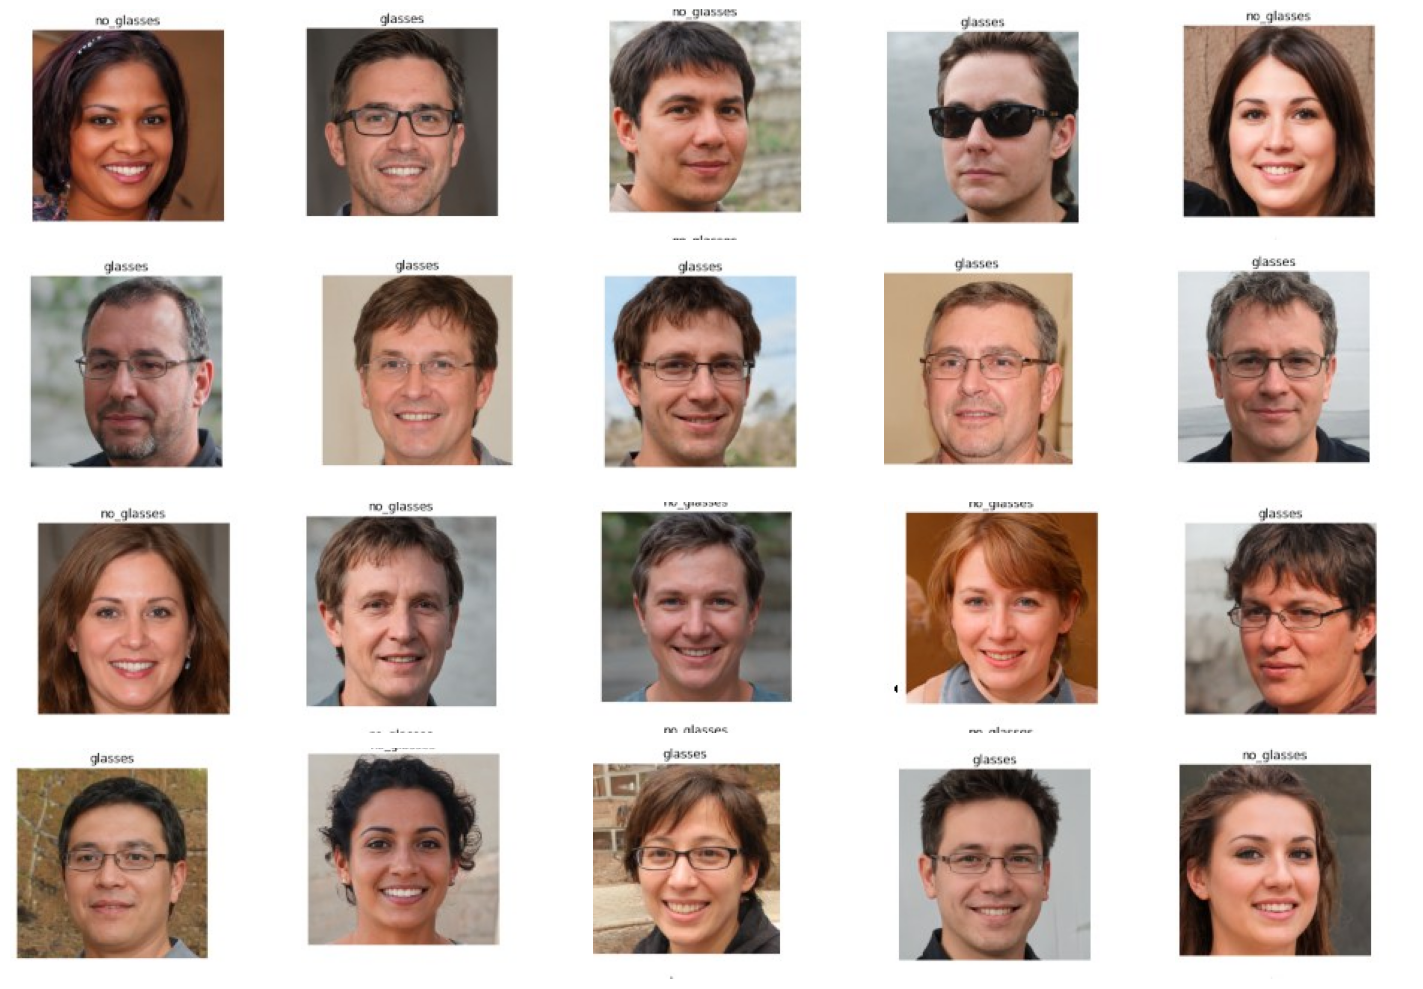

In [242]:
plt.figure(figsize=(15, 10))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    img_path = train.loc[i, "image_path"]
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [243]:
train_datagen=ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    rescale=1.0/255.0
)

In [244]:
augmented_images = train_datagen.flow_from_dataframe(
    train,
    x_col='image_path',
    y_col='label',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 104 validated image filenames belonging to 2 classes.


In [245]:
val_datagen = ImageDataGenerator(rescale=1.0/255.0)
val_generator = val_datagen.flow_from_dataframe(
    val,
    x_col='image_path',
    y_col='label',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 40 validated image filenames belonging to 2 classes.


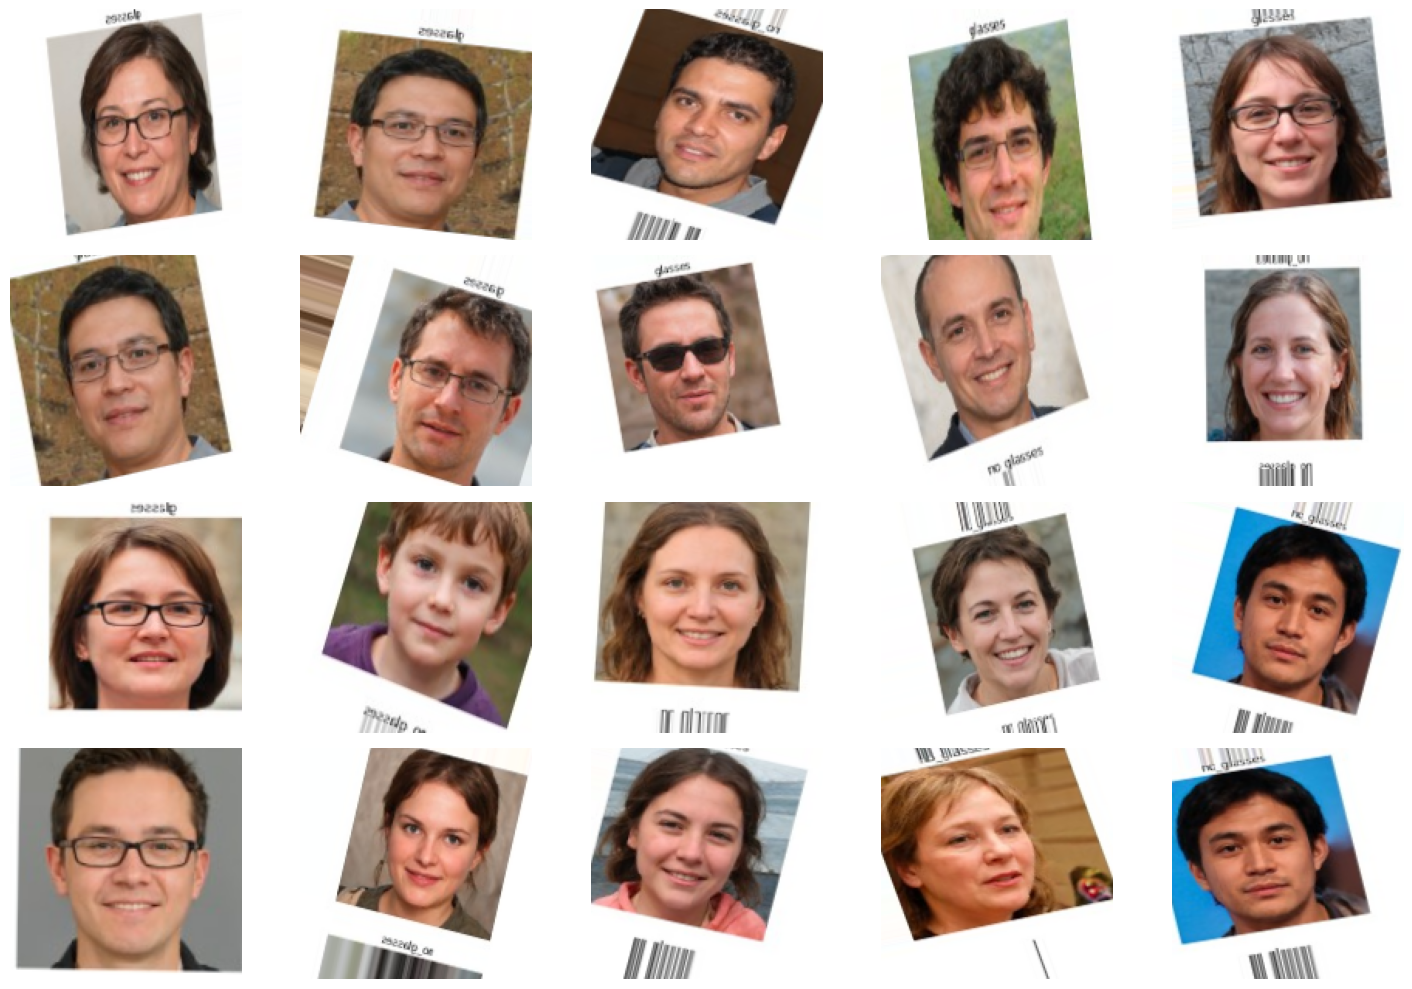

In [246]:
plt.figure(figsize=(15, 10))
for i in range(20):
    img, label = next(augmented_images) # Changed from augmented_images.next()
    plt.subplot(4, 5, i + 1)
    plt.imshow(img[0])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [247]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

In [248]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)                   │ (None, 148, 148, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 72, 72, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 34, 34, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_30 (MaxPooling2D)      │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 15, 15, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_31 (MaxPooling2D)      │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │         802,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 900,513 (3.44 MB)

 Trainable params: 900,513 (3.44 MB)

 Non-trainable params: 0 (0.00 B)

In [249]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [250]:
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

history = model.fit(
    augmented_images,
    validation_data=val_generator,
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping, checkpoint]
)

Epoch 1/50
2/4 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.5656 - loss: 0.6699 
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to best_model.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 865ms/step - accuracy: 0.5252 - loss: 0.9582 - val_accuracy: 0.5000 - val_loss: 0.6976
Epoch 2/50
1/4 ━━━━━━━━━━━━━━━━━━━━ 16s 5s/step - accuracy: 0.5625 - loss: 0.7098
Epoch 2: val_accuracy did not improve from 0.50000
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - accuracy: 0.5390 - loss: 0.7034 - val_accuracy: 0.5000 - val_loss: 0.6962
Epoch 3/50
1/4 ━━━━━━━━━━━━━━━━━━━━ 2s 905ms/step - accuracy: 0.5625 - loss: 0.6861
Epoch 3: val_accuracy did not improve from 0.50000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - accuracy: 0.5175 - loss: 0.6908 - val_accuracy: 0.5000 - val_loss: 0.6938
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5106 - loss: 0.6927
Epoch 4: val_accuracy did not improve from 0.50000
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.5181 - loss: 0.6925 - val_accuracy

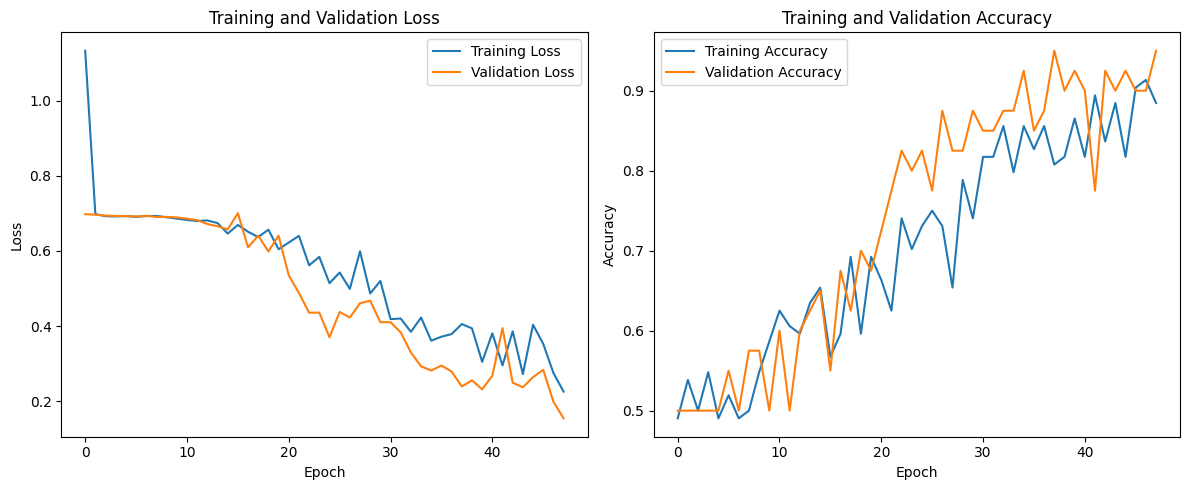

In [251]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [252]:
test_dir="/content/drive/MyDrive/Colab Notebooks/Glasses/test"
best_model=load_model('best_model.h5')

In [253]:
def predict_classes(model,directory):
  images=[]
  filenames=[]
  for img in os.listdir(directory):
    img_path=os.path.join(directory,img)
    img=image.load_img(img_path,target_size=(150,150))
    img=image.img_to_array(img)
    images.append(img)
    filenames.append(img_path)
  images = np.array(images)
  predictions = model.predict(images)
  predicted_classes = (predictions > 0.5).astype('int')
  return filenames, predicted_classes

In [254]:
test_image_paths,test_predictions=predict_classes(best_model,test_dir)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


In [255]:
predictions_df = pd.DataFrame({'image_path': test_image_paths, 'predicted_class': test_predictions.flatten()})

In [256]:
print(predictions_df.head())

                                          image_path  predicted_class
0  /content/drive/MyDrive/Colab Notebooks/Glasses...                1
1  /content/drive/MyDrive/Colab Notebooks/Glasses...                1
2  /content/drive/MyDrive/Colab Notebooks/Glasses...                1
3  /content/drive/MyDrive/Colab Notebooks/Glasses...                0
4  /content/drive/MyDrive/Colab Notebooks/Glasses...                1


In [257]:
actual_class=[1,0,0,0,1,0,1,1,0,0,0,1,0,0,1,1,0,1,1,1]

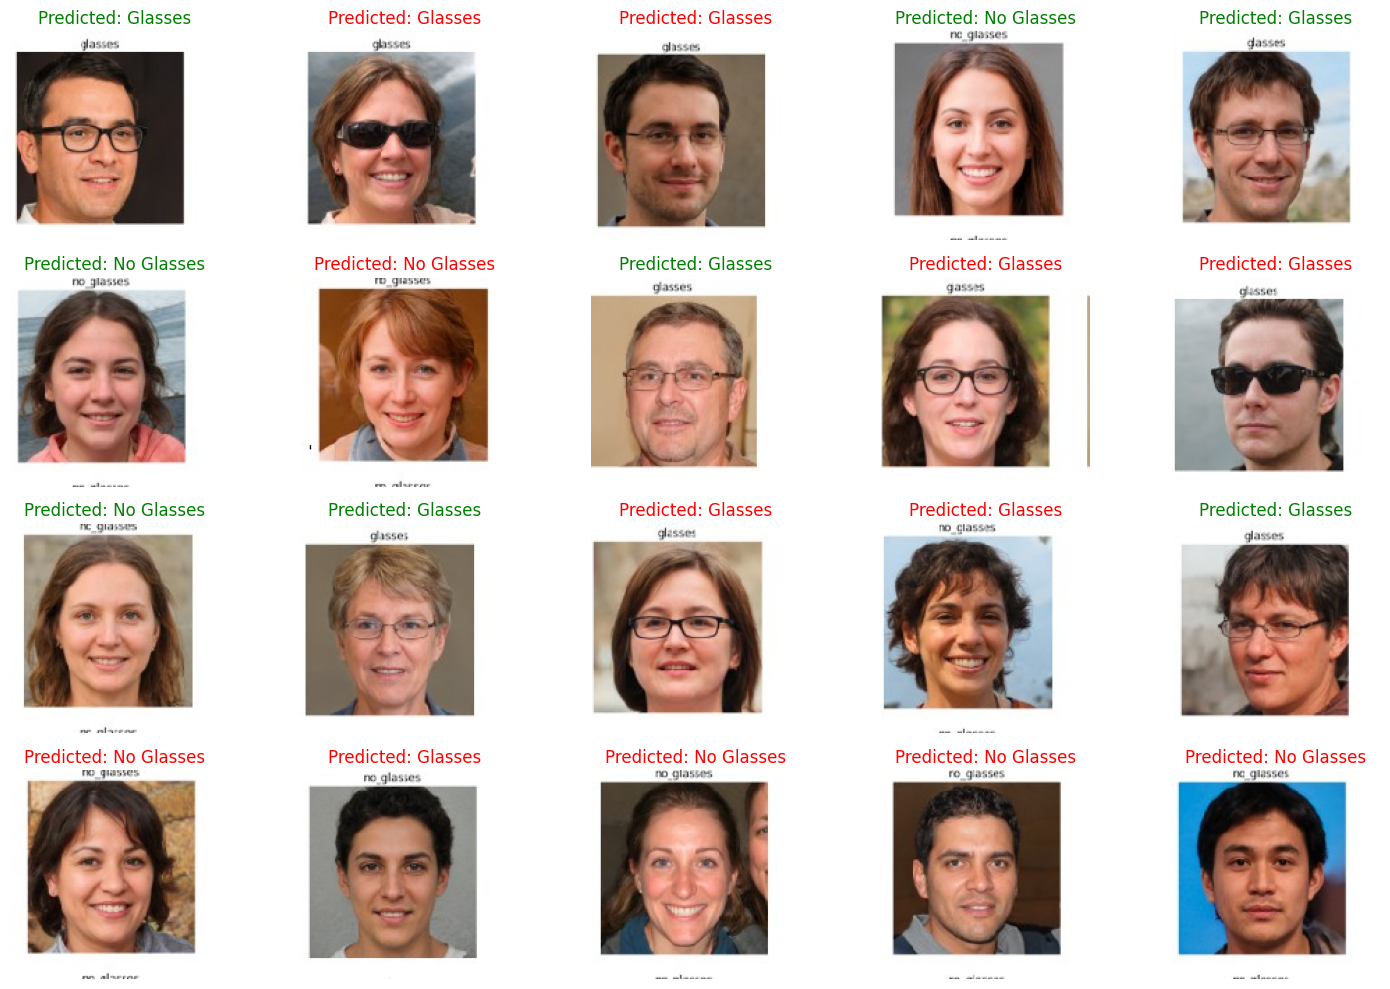

In [258]:
plt.figure(figsize=(15, 10))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    img_path = predictions_df.loc[i, 'image_path']
    img = image.load_img(img_path, target_size=(150, 150))
    img = image.img_to_array(img)/ 255.0
    plt.imshow(img)

    predicted = predictions_df.loc[i, 'predicted_class']
    actual = actual_class[i]

    color = 'green' if predicted == actual else 'red'
    plt.title(f"Predicted: {'Glasses' if predicted == 1 else 'No Glasses'}", color=color)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [259]:
predicted_classes = predictions_df['predicted_class'].tolist()

In [260]:
conf_matrix = confusion_matrix(actual_class, predicted_classes)

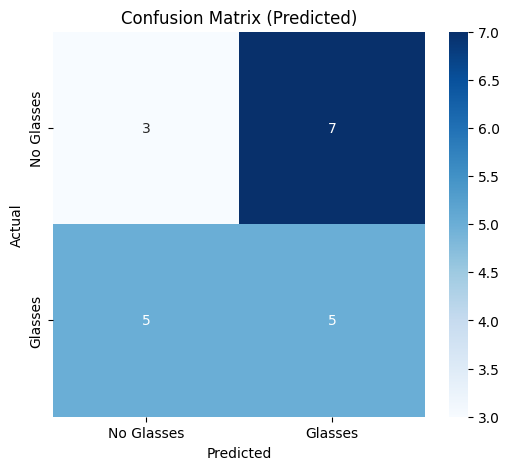

In [261]:
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g',
            xticklabels=['No Glasses', 'Glasses'],
            yticklabels=['No Glasses', 'Glasses'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Predicted)')
plt.show()